<a href="https://colab.research.google.com/github/AlexMendozaPrado/AlgoritmosAvanzados/blob/main/FuncionRosenbrock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

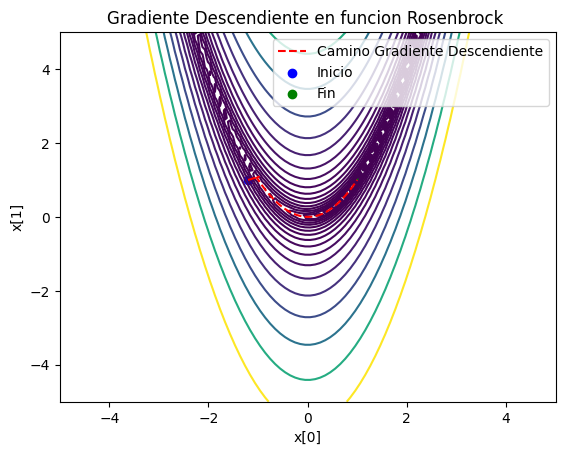

Funcion optima: [0.99988824 0.99977604]
valor optimo: 1.251115864060283e-08


In [15]:
import numpy as np
import matplotlib.pyplot as plt

def rosenbrock(x, n):
    return sum([100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2 for i in range(n-1)])

def rosenbrock_grad(x, n):
    grad = np.zeros(n)
    grad[0] = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
    for i in range(1, n-1):
        grad[i] = 200 * (x[i] - x[i-1]**2) - 400 * x[i] * (x[i+1] - x[i]**2) - 2 * (1 - x[i])
    grad[-1] = 200 * (x[n-1] - x[n-2]**2)
    return grad

def gradientDescent(x, alpha, lower, upper, n, gradFunc):
    trajectory = [x.copy()]
    while True:
        grad = gradFunc(x, n)
        if np.linalg.norm(grad) < 1e-4:
            break
        step = alpha * grad
        if np.any(np.abs(step) > 1e100):  # Checar si el paso es muy largo
            break
        x = x - step
        x = np.clip(x, lower, upper)  # FOrzar  las  restricciones
        trajectory.append(x.copy())
        if not np.all(np.isfinite(x)):  # Checar si tiene valors infinitos
            break
    return x, np.array(trajectory)

#Definir paramteros para la simulacion
alpha = 0.001  # Tasa de aprendizaje
lower, upper = -5, 5  # Restricciones para las variables
n = 2  # Dimension del problema

# Punto inicial
x_init = np.array([-1.2, 1])

# Correr gradiente descendiente
x_optimal, trajectory = gradientDescent(x_init, alpha, lower, upper, n, rosenbrock_grad)

# Generar el cuadricualdo
X, Y = np.meshgrid(np.linspace(lower, upper, 100), np.linspace(lower, upper, 100))
Z = rosenbrock(np.array([X, Y]), n)

# Graficar la curva de nivel
plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 20, base=10), cmap='viridis')
plt.plot(trajectory[:, 0], trajectory[:, 1], 'r--', label='Camino Gradiente Descendiente')
plt.scatter(trajectory[0, 0], trajectory[0, 1], c='b', label='Inicio')
plt.scatter(trajectory[-1, 0], trajectory[-1, 1], c='g', label='Fin')
plt.title('Gradiente Descendiente en funcion Rosenbrock ')
plt.xlabel('x[0]')
plt.ylabel('x[1]')
plt.legend()
plt.show()

# Print the optimal solution found
print(f"Funcion optima: {x_optimal}")
print(f"valor optimo: {rosenbrock(x_optimal, n)}")
